In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../transactions/reputable_transactions_H.csv")

In [4]:
df

,address,timeStamp,transaction_count_sent,total_value_sent,avg_value_sent,min_value_sent,max_value_sent,gas_sum_sent,gas_mean_sent,gasPrice_sum_sent,...,gas_mean_received,gasPrice_sum_received,gasUsed_sum_received,gasUsed_mean_received,error_count_received,unique_contracts_interacted_with_received,avg_min_between_received_tnx,time_diff_between_first_and_last,avg_min_between_sent_tnx_missing,avg_min_between_received_tnx_missing
0,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,2017-08-01 20:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,5.306800e-14,2.100000e-08,0.0,0.0,0.0,0.0,1440.000000,29760.0,1,1
1,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,2017-08-02 14:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,9.145500e-14,3.650000e-07,0.0,0.0,12.0,0.0,4.274242,29760.0,1,0
2,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,2017-08-02 15:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,1.771429e-13,1.360000e-07,0.0,0.0,6.0,0.0,7.602778,29760.0,1,0
3,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,2017-08-02 16:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,1.607980e-13,2.050000e-07,0.0,0.0,4.0,0.0,14.527778,29760.0,1,0
4,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,2017-08-02 17:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,2.033333e-13,9.200000e-08,0.0,0.0,3.0,0.0,18.833333,29760.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321030,0xffe203b59393593965842439ce1e7d7c78109b46,2024-09-18 07:00:00,1.0,0.091255,0.091255,0.091255,0.091255,8.864300e-14,8.864300e-14,0.0,...,1.007670e-13,0.000000e+00,55.0,55.0,0.0,0.0,1440.000000,517920.0,1,1
1321031,0xffe203b59393593965842439ce1e7d7c78109b46,2024-09-22 06:00:00,1.0,0.126463,0.126463,0.126463,0.126463,1.270440e-13,1.270440e-13,0.0,...,1.385680e-13,0.000000e+00,55.0,55.0,0.0,0.0,1440.000000,517920.0,1,1
1321032,0xffe203b59393593965842439ce1e7d7c78109b46,2024-09-22 08:00:00,1.0,0.113299,0.113299,0.113299,0.113299,1.910480e-13,1.910480e-13,0.0,...,2.036900e-13,0.000000e+00,55.0,55.0,0.0,0.0,1440.000000,517920.0,1,1
1321033,0xffe203b59393593965842439ce1e7d7c78109b46,2024-09-22 13:00:00,1.0,0.114771,0.114771,0.114771,0.114771,1.865570e-13,1.865570e-13,0.0,...,1.992690e-13,0.000000e+00,55.0,55.0,0.0,0.0,1440.000000,517920.0,1,1


In [5]:
# Select only the continuous variables from the provided columns
continuous_cols = [
    'transaction_count_sent', 'total_value_sent', 'avg_value_sent', 'min_value_sent',
    'max_value_sent', 'gas_sum_sent', 'gas_mean_sent', 'gasPrice_sum_sent', 'gasUsed_sum_sent',
    'gasUsed_mean_sent', 'error_count_sent', 'unique_contracts_interacted_with_sent',
    'avg_min_between_sent_tnx', 'transaction_count_received', 'total_value_received',
    'avg_value_received', 'min_value_received', 'max_value_received', 'gas_sum_received',
    'gas_mean_received', 'gasPrice_sum_received', 'gasUsed_sum_received', 'gasUsed_mean_received',
    'error_count_received', 'unique_contracts_interacted_with_received', 'avg_min_between_received_tnx',
    'time_diff_between_first_and_last'
]

# Now, remove outliers from only the continuous variables
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Reset index and display the cleaned DataFrame
df.reset_index(drop=True, inplace=True)


In [4]:
df.columns

Index(['address', 'timeStamp', 'transaction_count_sent', 'total_value_sent',
       'avg_value_sent', 'min_value_sent', 'max_value_sent', 'gas_sum_sent',
       'gas_mean_sent', 'gasPrice_sum_sent', 'gasUsed_sum_sent',
       'gasUsed_mean_sent', 'error_count_sent',
       'unique_contracts_interacted_with_sent', 'avg_min_between_sent_tnx',
       'transaction_count_received', 'total_value_received',
       'avg_value_received', 'min_value_received', 'max_value_received',
       'gas_sum_received', 'gas_mean_received', 'gasPrice_sum_received',
       'gasUsed_sum_received', 'gasUsed_mean_received', 'error_count_received',
       'unique_contracts_interacted_with_received',
       'avg_min_between_received_tnx', 'time_diff_between_first_and_last',
       'avg_min_between_sent_tnx_missing',
       'avg_min_between_received_tnx_missing'],
      dtype='object')

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.drop(columns=["address", "timeStamp"]).columns] = scaler.fit_transform(df[df.drop(columns=["address", "timeStamp"]).columns])

max_timesteps = 24

In [6]:
from sklearn.model_selection import train_test_split

unique_addresses_reputable = df['address'].unique()

# Step 2: Split the contract addresses into 70% for training and 30% for testing
train_addresses, test_addresses = train_test_split(unique_addresses_reputable, test_size=0.3, random_state=42, shuffle=True)

# Step 3: Create X_train by filtering the original dataframe for the training addresses
X_train_reputable = df[df['address'].isin(train_addresses)]

# Step 4: Create X_test by combining the transactions of the 30% test reputable addresses with all illicit contracts
X_test_reputable = df[df['address'].isin(test_addresses)]

In [10]:
X_train_reputable.to_csv("reputable_train.csv", index=False)
X_test_reputable.to_csv("reputable_test.csv", index=False)

In [21]:
X_train_reputable = pd.read_csv("reputable_train.csv")
# X_test_reputable = pd.read_csv("reputable_test.csv")

# CNN-Based Autoencoder

## Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Dropout, ZeroPadding1D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import kerastuner as kt

# Define basic mean squared error loss
def mse(y_true, y_pred):
    return tf.keras.losses.MeanSquaredError()(y_true, y_pred)
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import kerastuner as kt
# Define the CAE model with extended hyperparameters
class CAEHyperModel(kt.HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        input_seq = Input(shape=self.input_shape)

        # Encoder
        x = Conv1D(filters=hp.Int('filters_1', min_value=16, max_value=64, step=16), 
                   kernel_size=hp.Choice('kernel_size_1', values=[3, 5]), 
                   activation=hp.Choice('activation', values=['relu', 'tanh']), 
                   padding='same',
                   kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_reg_1', min_value=0, max_value=0.1, step=0.01)))(input_seq)
        x = MaxPooling1D(pool_size=hp.Choice('pool_size_1', values=[2, 4]), padding='same')(x)
        x = Dropout(hp.Float('dropout_1', min_value=0, max_value=0.5, step=0.1))(x)
        x = Conv1D(filters=hp.Int('filters_2', min_value=8, max_value=32, step=8), 
                   kernel_size=hp.Choice('kernel_size_2', values=[3, 5]), 
                   activation=hp.Choice('activation', values=['relu', 'tanh']), 
                   padding='same',
                   kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_reg_2', min_value=0, max_value=0.1, step=0.01)))(x)
        encoded = MaxPooling1D(pool_size=hp.Choice('pool_size_2', values=[2, 4]), padding='same')(x)

        # Decoder
        x = Conv1D(filters=hp.Int('filters_2', min_value=8, max_value=32, step=8), 
                   kernel_size=hp.Choice('kernel_size_2', values=[3, 5]), 
                   activation=hp.Choice('activation', values=['relu', 'tanh']), 
                   padding='same')(encoded)
        x = UpSampling1D(size=hp.Choice('up_sampling_size_1', values=[2, 4]))(x)
        x = Dropout(hp.Float('dropout_2', min_value=0, max_value=0.5, step=0.1))(x)
        x = Conv1D(filters=hp.Int('filters_1', min_value=16, max_value=64, step=16), 
                   kernel_size=hp.Choice('kernel_size_1', values=[3, 5]), 
                   activation=hp.Choice('activation', values=['relu', 'tanh']), 
                   padding='same')(x)
        x = UpSampling1D(size=hp.Choice('up_sampling_size_2', values=[2, 4]))(x)
        
        # Adjust the final output to match the original input sequence length
        x = x[:, :max_timesteps, :]
        decoded = Conv1D(self.input_shape[1], kernel_size=3, activation='sigmoid', padding='same')(x)

        # decoded = decoded[:, :self.input_shape[0], :]  # Ensure the output has the same length as the input
        model = Model(input_seq, decoded)
        model.compile(optimizer=tf.keras.optimizers.Adam(
                          hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mse')
        return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure the output is a float

lr_scheduler = LearningRateScheduler(scheduler)

# Data preparation
def prepare_data(df, max_timesteps):
    # Prepare data for reputable contracts
    reputable_df = df[df['is_reputable'] == 1]
    sequences = [group[df.drop(columns=["address", "timeStamp"]).columns].values
                 for _, group in reputable_df.groupby('address')]
    X = pad_sequences(sequences, maxlen=max_timesteps, dtype='float32', padding='post', truncating='post')
    return X

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import cudf
import cupy as cp
from cudf.core.column import as_column
from cupy import pad

def prepare_data_gpu(df, max_timesteps):
    # Convert pandas DataFrame to cuDF DataFrame
    df_cudf = cudf.from_pandas(df)

    # Group transactions by contract address
    grouped = df_cudf.groupby('address')

    # Prepare sequences using cuDF and cuPy
    sequences = []
    addresses = []
    
    # Iterate over grouped addresses
    for address, group in grouped:
        # Drop unwanted columns and convert to cuPy array
        sequence = cp.asarray(group.drop(columns=["address", "timeStamp"]).to_pandas().values)
        
        # Handle long sequences by splitting into multiple segments
        if len(sequence) > max_timesteps:
            # Split sequence into segments of max_timesteps
            num_segments = int(cp.ceil(len(sequence) / max_timesteps))
            for i in range(num_segments):
                sub_sequence = sequence[i * max_timesteps: (i + 1) * max_timesteps]
                sequences.append(sub_sequence)
                addresses.append(address)
        else:
            sequences.append(sequence)
            addresses.append(address)

    # Pad sequences to ensure uniform length using list comprehension directly
    X_padded = cp.array([cp.pad(seq, ((0, max_timesteps - len(seq)), (0, 0)), mode='constant') if len(seq) < max_timesteps else seq for seq in sequences])

    return X_padded, addresses

# Set a reasonable max_timesteps value
max_timesteps = 24  # Adjust based on your data distribution analysis

# Prepare data without losing transactions using GPU acceleration
X_rep, addresses_rep = prepare_data_gpu(df, max_timesteps)

In [25]:
X_rep= X_rep.get()

## Model Training

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import keras_tuner as kt
import numpy as np
# Function to perform K-Fold Cross-Validation and Batch size tuning
from sklearn.model_selection import TimeSeriesSplit

def train_and_evaluate(X, max_timesteps, batch_sizes=[16]):
  
    histories = {}
    tuning_results = []  # Store tuning results

    for batch_size in batch_sizes:
        fold_no = 1
        
        # Reinitialize the split generator for each batch size
        tscv = TimeSeriesSplit(n_splits=5)
        split_generator = tscv.split(X)
        
        for train_index, val_index in split_generator:
            X_train, X_val = X[train_index], X[val_index]
            
            # Define the model
            hypermodel = CAEHyperModel(input_shape=(max_timesteps, X.shape[2]))
            tuner = kt.RandomSearch(
                hypermodel,
                objective='val_loss',
                max_trials=5,
                executions_per_trial=1,
                directory='tuner_dir',
                project_name=f'cae_tuning_tnx_{batch_size}'
            )

            # Perform hyperparameter search WITHOUT the LearningRateScheduler
            tuner.search(X_train, X_train, epochs=30, batch_size=batch_size, validation_data=(X_val, X_val))

            # Get the best hyperparameters and store them
            best_hp = tuner.oracle.get_best_trials(1)[0].hyperparameters.values

            best_trial = tuner.oracle.get_best_trials(1)[0]
            val_loss_history = best_trial.metrics.get_history('val_loss')
            best_val_loss = val_loss_history[-1]  # Get the last validation loss value (best)

            # Append the results including best validation loss
            tuning_results.append({
                'batch_size': batch_size,
                'fold': fold_no,
                'best_filters_1': best_hp['filters_1'],
                'best_filters_2': best_hp['filters_2'],
                'learning_rate': best_hp['learning_rate'],
                'activation': best_hp['activation'], 
                'kernel_size_1': best_hp['kernel_size_1'],
                'kernel_size_2': best_hp['kernel_size_2'],
                'l2_reg_1': best_hp['l2_reg_1'],
                'l2_reg_2': best_hp['l2_reg_2'],
                'pool_size_1': best_hp['pool_size_1'],
                'pool_size_2': best_hp['pool_size_2'],  # Corrected
                'dropout_1': best_hp['dropout_1'],
                'dropout_2': best_hp['dropout_2'],
                'up_sampling_size_1': best_hp['up_sampling_size_1'],
                'up_sampling_size_2': best_hp['up_sampling_size_2'],
                'val_loss': best_val_loss
            })

            # Get the best model
            best_model = tuner.get_best_models(num_models=1)[0]
            best_model.save(f"cae_tnx_{batch_size}.keras")

            # Now fit the best model with the LearningRateScheduler
            history = best_model.fit(
                X_train, X_train,
                epochs=30,
                batch_size=batch_size,
                validation_data=(X_val, X_val),
                callbacks=[lr_scheduler]  # Add the scheduler after finding the best model
            )

            # Initialize histories for the current batch size if not done already
            if batch_size not in histories:
                histories[batch_size] = {'train_loss': [], 'val_loss': []}
                
            # Collect the loss histories for the current fold
            histories[batch_size]['train_loss'].append(history.history['loss'])
            histories[batch_size]['val_loss'].append(history.history['val_loss'])
            
            fold_no += 1
    
    # Plot training and validation loss for different batch sizes
    plt.figure(figsize=(12, 6))
    for batch_size in batch_sizes:
        # Safeguard against missing data
        if batch_size in histories:
            train_loss_avg = np.mean(histories[batch_size]['train_loss'], axis=0)
            val_loss_avg = np.mean(histories[batch_size]['val_loss'], axis=0)
            
            # Create a new figure for each batch size
            plt.figure(figsize=(8, 5))
            plt.plot(train_loss_avg, label=f'Training Loss (batch={batch_size})')
            plt.plot(val_loss_avg, '--', label=f'Validation Loss (batch={batch_size})')
            
            # Set plot title and labels
            plt.title(f'Training and Validation Loss for Batch Size {batch_size}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            
            # Show the plot
            plt.show()
    
    # Hyperparameter tuning results as a DataFrame
    tuning_df = pd.DataFrame(tuning_results)
    
    # Print the hyperparameter tuning results
    print("\nHyperparameter Tuning Results:")
    print(tuning_df)

    # Save the tuning results to a CSV for later analysis
    tuning_df.to_csv('hyperparameter_tuning_results_tnx.csv', index=False)

    return best_model, tuning_df


Reloading Tuner from tuner_dir/cae_tuning_tnx_16/tuner0.json


I0000 00:00:1728761475.089048   18570 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728761475.235434   18570 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728761475.235527   18570 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728761475.237920   18570 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728761475.238011   18570 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/30


/home/malikcyrus/anaconda3/envs/multimodal-env/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
I0000 00:00:1728761477.374844  106573 service.cc:146] XLA service 0x7fcaf801aff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728761477.374882  106573 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-10-12 21:31:17.416813: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-12 21:31:17.576771: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 64/257 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123

I0000 00:00:1728761480.362730  106573 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


257/257 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0122 - val_loss: 0.0105 - learning_rate: 0.0030
Epoch 2/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0120 - val_loss: 0.0103 - learning_rate: 0.0030
Epoch 3/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122 - val_loss: 0.0104 - learning_rate: 0.0030
Epoch 4/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0119 - val_loss: 0.0104 - learning_rate: 0.0030
Epoch 5/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0120 - val_loss: 0.0102 - learning_rate: 0.0030
Epoch 6/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0120 - val_loss: 0.0103 - learning_rate: 0.0030
Epoch 7/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119 - val_loss: 0.0102 - learning_rate: 0.0030
Epoch 8/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0120 - val_loss: 0.0101 - learning_rate: 0.0030
Epoch 9/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119 - val_loss: 0.0102 - learning_rate: 0.0030
Epoch 10/30
257/257 ━

<Figure size 1200x600 with 0 Axes>

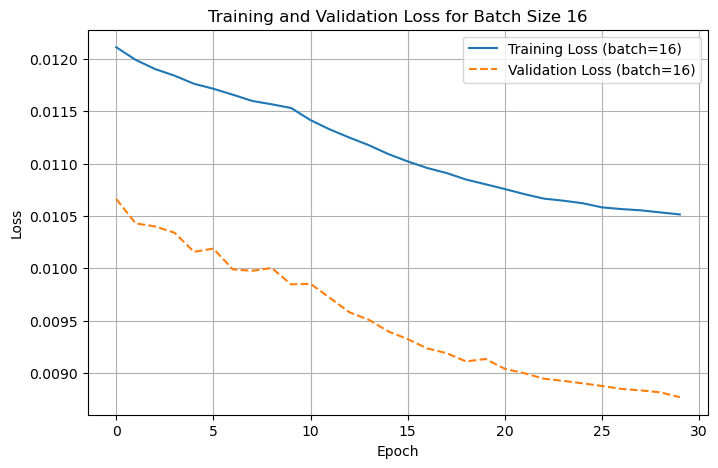


Hyperparameter Tuning Results:
   batch_size  fold  best_filters_1  best_filters_2  learning_rate activation  \
0          16     1              64               8       0.002968       tanh   
1          16     2              64               8       0.002968       tanh   
2          16     3              64               8       0.002968       tanh   
3          16     4              64               8       0.002968       tanh   
4          16     5              64               8       0.002968       tanh   

   kernel_size_1  kernel_size_2  l2_reg_1  l2_reg_2  pool_size_1  pool_size_2  \
0              5              5       0.0       0.0            2            4   
1              5              5       0.0       0.0            2            4   
2              5              5       0.0       0.0            2            4   
3              5              5       0.0       0.0            2            4   
4              5              5       0.0       0.0            2            

In [27]:
model, tuning_df = train_and_evaluate(X=X_rep, max_timesteps=max_timesteps)

Trial 5 Complete [00h 00m 17s]
val_loss: 0.018163202330470085

Best val_loss So Far: 0.01606130413711071
Total elapsed time: 00h 01m 24s
Epoch 1/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0176 - val_loss: 0.0161 - learning_rate: 7.5883e-04
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - val_loss: 0.0161 - learning_rate: 7.5883e-04
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - val_loss: 0.0160 - learning_rate: 7.5883e-04
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - val_loss: 0.0160 - learning_rate: 7.5883e-04
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - val_loss: 0.0162 - learning_rate: 7.5883e-04
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - val_loss: 0.0160 - learning_rate: 7.5883e-04
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - val_loss: 0.0159 - learning_rate: 7.5883e-04
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - val_loss: 0

<Figure size 1200x600 with 0 Axes>

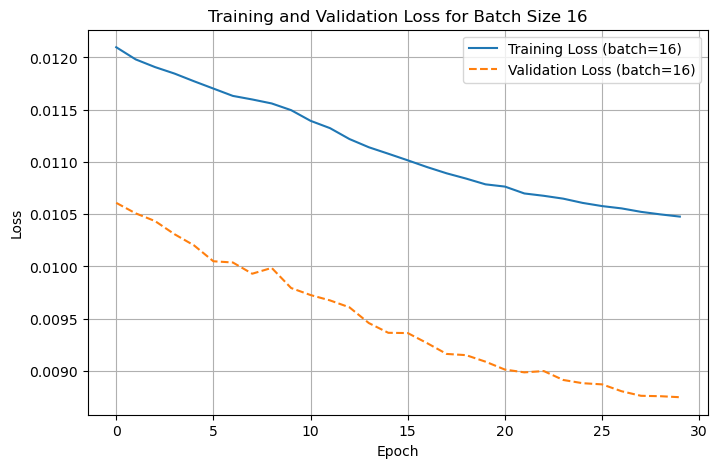

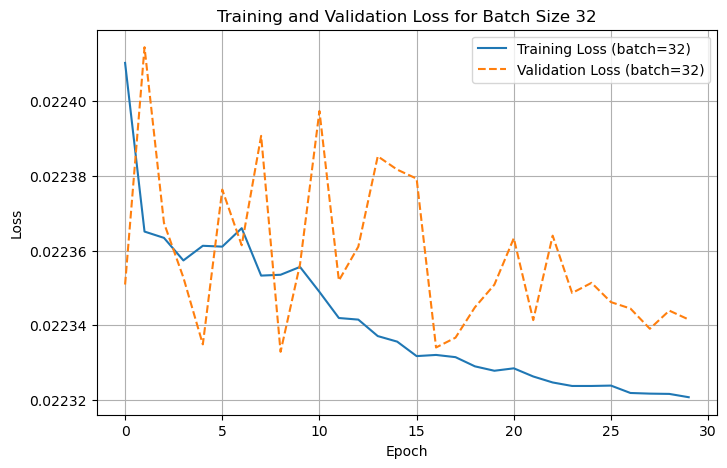

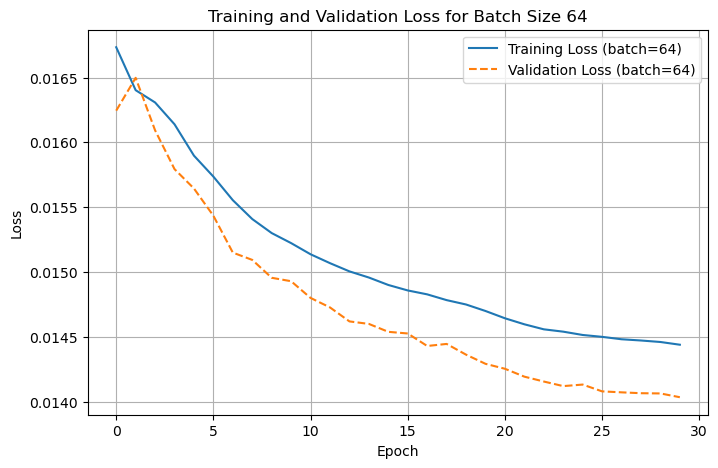


Hyperparameter Tuning Results:
    batch_size  fold  best_filters_1  best_filters_2  learning_rate  \
0           16     1              64               8       0.002968   
1           16     2              64               8       0.002968   
2           16     3              64               8       0.002968   
3           16     4              64               8       0.002968   
4           16     5              64               8       0.002968   
5           32     1              64              24       0.001953   
6           32     2              64              24       0.001953   
7           32     3              64              24       0.001953   
8           32     4              64              24       0.001953   
9           32     5              64              24       0.001953   
10          64     1              16              32       0.000759   
11          64     2              16              32       0.000759   
12          64     3              16         

In [16]:
model, tuning_df = train_and_evaluate(X=X_rep, max_timesteps=max_timesteps)

## Model Evaluation

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model("cae_tnx_16.keras")

2024-10-12 13:40:50.319227: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-12 13:40:50.420201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-12 13:40:50.455590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-12 13:40:50.466024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-12 13:40:50.539016: I tensorflow/core/platform/cpu_feature_guar

In [24]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import cudf
import cupy as cp
from cudf.core.column import as_column
from cupy import pad

def prepare_data_gpu(df, max_timesteps):
    # Convert pandas DataFrame to cuDF DataFrame
    df_cudf = cudf.from_pandas(df)

    # Group transactions by contract address
    grouped = df_cudf.groupby('address')

    # Prepare sequences using cuDF and cuPy
    sequences = []
    addresses = []
    
    # Iterate over grouped addresses
    for address, group in grouped:
        # Drop unwanted columns and convert to cuPy array
        sequence = cp.asarray(group.drop(columns=["address", "timeStamp"]).to_pandas().values)
        
        # Handle long sequences by splitting into multiple segments
        if len(sequence) > max_timesteps:
            # Split sequence into segments of max_timesteps
            num_segments = int(cp.ceil(len(sequence) / max_timesteps))
            for i in range(num_segments):
                sub_sequence = sequence[i * max_timesteps: (i + 1) * max_timesteps]
                sequences.append(sub_sequence)
                addresses.append(address)
        else:
            sequences.append(sequence)
            addresses.append(address)

    # Pad sequences to ensure uniform length using list comprehension directly
    X_padded = cp.array([cp.pad(seq, ((0, max_timesteps - len(seq)), (0, 0)), mode='constant') if len(seq) < max_timesteps else seq for seq in sequences])

    return X_padded, addresses

# Set a reasonable max_timesteps value
max_timesteps = 24  # Adjust based on your data distribution analysis

# Prepare data without losing transactions using GPU acceleration
# X_rep, addresses_rep = prepare_data_gpu(X_test_reputable, max_timesteps)
X_rep, addresses_rep = prepare_data_gpu(X_train_reputable, max_timesteps)

In [11]:
import cupy as cp
# X_rep = cp.load("X_24.npy").get()
X_rep = X_rep.get()
# addresses = df['address'].unique()

# Step 1: Predict the reconstructed sequences using the trained model
reconstructed_X = model.predict(X_rep)

# Step 2: Initialize a list to store reconstruction errors per transaction
transaction_errors = []

# Step 3: Calculate reconstruction error per transaction across all contracts
for i in range(X_rep.shape[0]):  # For each contract (or address)
    address = addresses_rep[i]  # Get the corresponding address
    original_sequence = X_rep[i]
    reconstructed_sequence = reconstructed_X[i]
    
    # Calculate MSE for each transaction within the contract
    for j in range(original_sequence.shape[0]):  # For each transaction in the contract
        # Skip padded transactions (assuming they are zero-padded)
        if np.all(original_sequence[j] == 0):
            continue
        
        # Calculate reconstruction error (MSE) for the current transaction
        transaction_error = np.mean(np.square(original_sequence[j] - reconstructed_sequence[j]))
        
        # Append the error with the address and transaction index
        transaction_errors.append({
            'address': address,           # Contract address
            'transaction_index': j,       # Index of the transaction in the sequence
            'reconstruction_error': transaction_error
        })

# Convert to DataFrame for easier handling if needed
transaction_error_df_rep = pd.DataFrame(transaction_errors)
transaction_error_df_rep['contract_status'] = 1

314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [9]:
transaction_error_df_rep

,address,transaction_index,reconstruction_error,contract_status
0,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,0,0.002563,1
1,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,1,0.028723,1
2,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,2,0.021146,1
3,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,3,0.002499,1
4,0x006bea43baa3f7a6f765f14f10a1a1b08334ef45,4,0.028099,1
...,...,...,...,...
820915,0xffe203b59393593965842439ce1e7d7c78109b46,2,0.013279,1
820916,0xffe203b59393593965842439ce1e7d7c78109b46,3,0.017995,1
820917,0xffe203b59393593965842439ce1e7d7c78109b46,4,0.004022,1
820918,0xffe203b59393593965842439ce1e7d7c78109b46,5,0.037615,1


In [7]:
ill_df = pd.read_csv("../transactions/illicit_transactions_H.csv")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ill_df[ill_df.drop(columns=["address", "timeStamp"]).columns] = scaler.fit_transform(ill_df[ill_df.drop(columns=["address", "timeStamp"]).columns])

max_timesteps = 24
def prepare_data(df, max_timesteps):
    sequences = [group[df.drop(columns=["address", "timeStamp"]).columns].values
                 for _, group in df.groupby('address')]
    X = pad_sequences(sequences, maxlen=max_timesteps, dtype='float32', padding='post', truncating='post')
    return X

X_ill = prepare_data(ill_df, max_timesteps)

addresses_ill = ill_df['address'].unique()

# Step 1: Predict the reconstructed sequences using the trained model
reconstructed_X = model.predict(X_ill)

# Step 2: Initialize a list to store reconstruction errors per transaction
transaction_errors = []

# Step 3: Calculate reconstruction error per transaction across all contracts
for i in range(X_ill.shape[0]):  # For each contract (or address)
    address = addresses_ill[i]  # Get the corresponding address
    original_sequence = X_ill[i]
    reconstructed_sequence = reconstructed_X[i]
    
    # Calculate MSE for each transaction within the contract
    for j in range(original_sequence.shape[0]):  # For each transaction in the contract
        # Skip padded transactions (assuming they are zero-padded)
        if np.all(original_sequence[j] == 0):
            continue
        
        # Calculate reconstruction error (MSE) for the current transaction
        transaction_error = np.mean(np.square(original_sequence[j] - reconstructed_sequence[j]))
        
        # Append the error with the address and transaction index
        transaction_errors.append({
            'address': address,           # Contract address
            'transaction_index': j,       # Index of the transaction in the sequence
            'reconstruction_error': transaction_error
        })

# Convert to DataFrame for easier handling if needed
transaction_error_df_ill = pd.DataFrame(transaction_errors)
transaction_error_df_ill['contract_status'] = 0

NameError: name 'pad_sequences' is not defined

In [8]:
X_ill, addresses_ill = prepare_data_gpu(ill_df, max_timesteps)

In [10]:
transaction_error_df_rep['reconstruction_error'].describe()

count    237253.000000
mean          0.010980
std           0.014592
min           0.000022
25%           0.001605
50%           0.004456
75%           0.014116
max           0.122241
Name: reconstruction_error, dtype: float64

In [12]:
reconstruction_df = pd.concat([transaction_error_df_rep, transaction_error_df_ill], ignore_index=True)

In [21]:
reconstruction_df.columns

Index(['address', 'transaction_index', 'reconstruction_error',
       'contract_status'],
      dtype='object')

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Define the search space for thresholds
thresholds = np.arange(75, 95, 5)  # Percentiles for reconstruction error threshold
contract_thresholds = np.arange(0.1, 0.7, 0.01)  # Contract-level anomaly thresholds

# Variables to store the best metrics
best_f1 = 0
best_params = {}

# Iterate over each combination of thresholds
for thresh in thresholds:
    for contract_thresh in contract_thresholds:
        # Calculate transaction-level anomaly threshold
        transaction_threshold = np.percentile(reconstruction_df['reconstruction_error'], thresh)
        reconstruction_df['is_anomalous'] = reconstruction_df['reconstruction_error'] > transaction_threshold

        # Calculate contract-level anomaly scores
        contract_anomaly_scores = reconstruction_df.groupby('address')['is_anomalous'].mean()
        predicted_illicit = contract_anomaly_scores > contract_thresh

        # Merge with the actual labels for evaluation
        results_df = pd.DataFrame({
            'address': contract_anomaly_scores.index,
            'anomaly_score': contract_anomaly_scores.values,
            'predicted_illicit': predicted_illicit,
            'actual_illicit': reconstruction_df.groupby('address')['contract_status'].first().apply(lambda x: 1 - x)
        })

        # Calculate evaluation metrics
        f1 = f1_score(results_df['actual_illicit'], results_df['predicted_illicit'])
        
        # Check if this combination is better
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'threshold': thresh, 'contract_threshold': contract_thresh}

# Output the best parameters and F1-score
print(f"Best F1-score: {best_f1}")
print(f"Best parameters: {best_params}")


Best F1-score: 0.92
Best parameters: {'threshold': 90, 'contract_threshold': 0.23999999999999994}


In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, classification_report, roc_auc_score

# Set the anomaly detection threshold
threshold = np.percentile(reconstruction_df['reconstruction_error'], 90)
reconstruction_df['is_anomalous'] = reconstruction_df['reconstruction_error'] > threshold

# Aggregate anomalies at the contract level
contract_anomaly_scores = reconstruction_df.groupby('address')['is_anomalous'].mean()
predicted_illicit = contract_anomaly_scores > 0.3

# Merge with the actual labels for evaluation
results_df = pd.DataFrame({
    'address': contract_anomaly_scores.index,
    'anomaly_score': contract_anomaly_scores.values,
    'predicted_illicit': predicted_illicit,
    'actual_illicit': reconstruction_df.groupby('address')['contract_status'].first().apply(lambda x: 1 - x)
})

# Evaluate the performance
print("Confusion Matrix:")
cm = confusion_matrix(results_df['actual_illicit'], results_df['predicted_illicit'])
print(cm)

print("\nClassification Report:")
print(classification_report(results_df['actual_illicit'], results_df['predicted_illicit'], digits=4))

print("\nAccuracy:")
print(accuracy_score(results_df['actual_illicit'], results_df['predicted_illicit']))

print("\nAUC:")
print(roc_auc_score(results_df['actual_illicit'], results_df['predicted_illicit']))

Confusion Matrix:
[[286   5]
 [  7  69]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9761    0.9828    0.9795       291
           1     0.9324    0.9079    0.9200        76

    accuracy                         0.9673       367
   macro avg     0.9543    0.9454    0.9497       367
weighted avg     0.9671    0.9673    0.9671       367


Accuracy:
0.9673024523160763

AUC:
0.9453563031289564


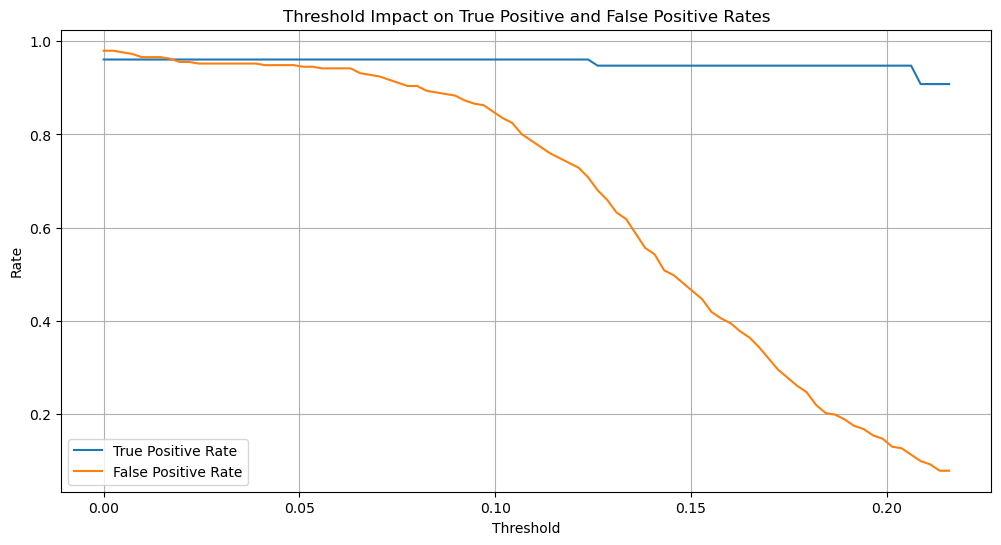

In [26]:
import matplotlib.pyplot as plt
# Plot Threshold Impact on True Positive and False Positive Rates
thresholds = np.linspace(0, max(reconstruction_df['reconstruction_error']), 90)
tpr_list, fpr_list = [], []

for threshold in thresholds:
    predicted_illicit = results_df['anomaly_score'] > threshold
    tn, fp, fn, tp = confusion_matrix(results_df['actual_illicit'], predicted_illicit).ravel()
    tpr_list.append(tp / (tp + fn))
    fpr_list.append(fp / (fp + tn))

plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='True Positive Rate')
plt.plot(thresholds, fpr_list, label='False Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Threshold Impact on True Positive and False Positive Rates')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Define the search space for thresholds
thresholds = np.arange(75, 90, 5)  # Percentiles for reconstruction error threshold
contract_thresholds = np.arange(0.1, 0.7, 0.01)  # Contract-level anomaly thresholds

# Variables to store the best metrics
best_f1 = 0
best_params = {}

# Iterate over each combination of thresholds
for thresh in thresholds:
    for contract_thresh in contract_thresholds:
        # Calculate transaction-level anomaly threshold
        transaction_threshold = np.percentile(reconstruction_df['reconstruction_error'], thresh)
        reconstruction_df['is_anomalous'] = reconstruction_df['reconstruction_error'] > transaction_threshold

        # Calculate contract-level anomaly scores
        contract_anomaly_scores = reconstruction_df.groupby('address')['is_anomalous'].mean()
        predicted_illicit = contract_anomaly_scores > contract_thresh

        # Merge with the actual labels for evaluation
        results_df = pd.DataFrame({
            'address': contract_anomaly_scores.index,
            'anomaly_score': contract_anomaly_scores.values,
            'predicted_illicit': predicted_illicit,
            'actual_illicit': reconstruction_df.groupby('address')['contract_status'].first().apply(lambda x: 1 - x)
        })

        # Calculate evaluation metrics
        f1 = f1_score(results_df['actual_illicit'], results_df['predicted_illicit'])
        
        # Check if this combination is better
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'threshold': thresh, 'contract_threshold': contract_thresh}

# Output the best parameters and F1-score
print(f"Best F1-score: {best_f1}")
print(f"Best parameters: {best_params}")

Best F1-score: 0.8904109589041096
Best parameters: {'threshold': 85, 'contract_threshold': 0.3899999999999999}


In [84]:
np.percentile(reconstruction_df['reconstruction_error'], 100)

0.2159380465745926

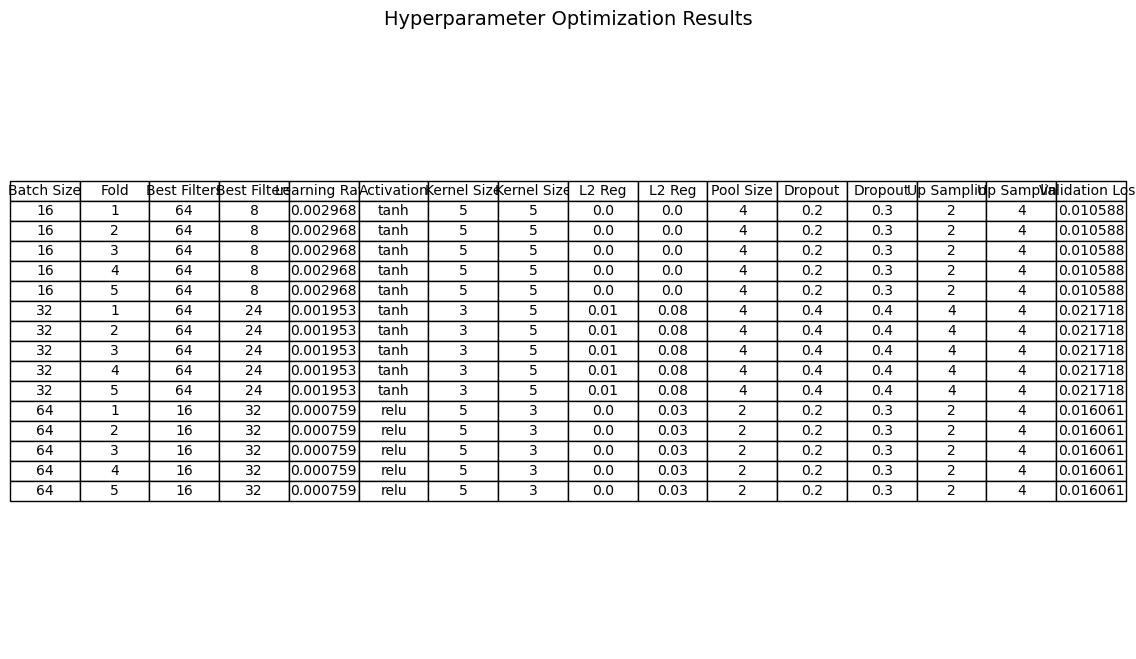

In [20]:
import matplotlib.pyplot as plt
data = {
    "batch_size": [16, 16, 16, 16, 16, 32, 32, 32, 32, 32, 64, 64, 64, 64, 64],
    "fold": [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    "best_filters_1": [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 16, 16, 16, 16, 16],
    "best_filters_2": [8, 8, 8, 8, 8, 24, 24, 24, 24, 24, 32, 32, 32, 32, 32],
    "learning_rate": [
        0.002968, 0.002968, 0.002968, 0.002968, 0.002968,
        0.001953, 0.001953, 0.001953, 0.001953, 0.001953,
        0.000759, 0.000759, 0.000759, 0.000759, 0.000759
    ],
    "activation": ['tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'relu', 'relu', 'relu', 'relu', 'relu'],
    "kernel_size_1": [5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5],
    "kernel_size_2": [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3],
    "l2_reg_1": [0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0],
    "l2_reg_2": [0.0, 0.0, 0.0, 0.0, 0.0, 0.08, 0.08, 0.08, 0.08, 0.08, 0.03, 0.03, 0.03, 0.03, 0.03],
    "pool_size_1": [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2],
    "dropout_1": [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2],
    "dropout_2": [0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3],
    "up_sampling_size_1": [2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2],
    "up_sampling_size_2": [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    "val_loss": [
        0.010588, 0.010588, 0.010588, 0.010588, 0.010588,
        0.021718, 0.021718, 0.021718, 0.021718, 0.021718,
        0.016061, 0.016061, 0.016061, 0.016061, 0.016061
    ]
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Create the table with the original data
table_data = df.values.tolist()
columns = [
    'Batch Size', 'Fold', 
    'Best Filters', 'Best Filters', 
    'Learning Rate', 
    'Activation', 
    'Kernel Size', 'Kernel Size', 
    'L2 Reg', 'L2 Reg', 
    'Pool Size', 
    'Dropout', 'Dropout', 
    'Up Sampling', 'Up Sampling', 
    'Validation Loss'
]

# Create the table
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')

# Merge header cells for better organization using multirow/multicolumn
# Set the header for Best Filters
table[0, 2].set_text_props(text="Best Filters")
table[0, 3].visible = False  # Hide the second header cell

# Set the header for Kernel Size
table[0, 6].set_text_props(text="Kernel Size")
table[0, 7].visible = False  # Hide the second header cell

# Set the header for L2 Reg
table[0, 8].set_text_props(text="L2 Reg")
table[0, 9].visible = False  # Hide the second header cell

# Set the header for Dropout
table[0, 11].set_text_props(text="Dropout")
table[0, 12].visible = False  # Hide the second header cell

# Set the header for Up Sampling
table[0, 13].set_text_props(text="Up Sampling")
table[0, 14].visible = False  # Hide the second header cell

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Hyperparameter Optimization Results', fontsize=14)
plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming best_params and best_auc are obtained from the previous search
# best_params = {'threshold': ..., 'contract_threshold': ...}

# Use the best parameters to classify the contracts
best_transaction_threshold = np.percentile(reconstruction_df['reconstruction_error'], best_params['threshold'])
best_contract_threshold = best_params['contract_threshold']

# Step 1: Calculate transaction-level anomaly status using the best transaction threshold
reconstruction_df['is_anomalous'] = reconstruction_df['reconstruction_error'] > best_transaction_threshold

# Step 2: Calculate contract-level anomaly scores
contract_anomaly_scores = reconstruction_df.groupby('address')['is_anomalous'].mean()

# Step 3: Classify contracts using the best contract threshold
predicted_illicit = contract_anomaly_scores > best_contract_threshold

# Step 4: Merge with the actual labels for evaluation
results_df = pd.DataFrame({
    'address': contract_anomaly_scores.index,
    'anomaly_score': contract_anomaly_scores.values,
    'predicted_illicit': predicted_illicit,
    'actual_illicit': reconstruction_df.groupby('address')['contract_status'].first().apply(lambda x: 1 - x)
})

# Step 5: Generate evaluation metrics
# Confusion Matrix
conf_matrix = confusion_matrix(results_df['actual_illicit'], results_df['predicted_illicit'])

# Classification Report
class_report = classification_report(results_df['actual_illicit'], results_df['predicted_illicit'], digits=4)

# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(results_df['actual_illicit'], results_df['predicted_illicit'])
precision = precision_score(results_df['actual_illicit'], results_df['predicted_illicit'])
recall = recall_score(results_df['actual_illicit'], results_df['predicted_illicit'])
f1 = f1_score(results_df['actual_illicit'], results_df['predicted_illicit'])

# AUC Score (Using the continuous anomaly score)
auc = roc_auc_score(results_df['actual_illicit'], results_df['anomaly_score'])

# Step 6: Output the evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")


Confusion Matrix:
 [[286   5]
 [ 11  65]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9630    0.9828    0.9728       291
           1     0.9286    0.8553    0.8904        76

    accuracy                         0.9564       367
   macro avg     0.9458    0.9190    0.9316       367
weighted avg     0.9558    0.9564    0.9557       367

Accuracy: 0.9564
Precision: 0.9286
Recall: 0.8553
F1-Score: 0.8904
AUC Score: 0.9438


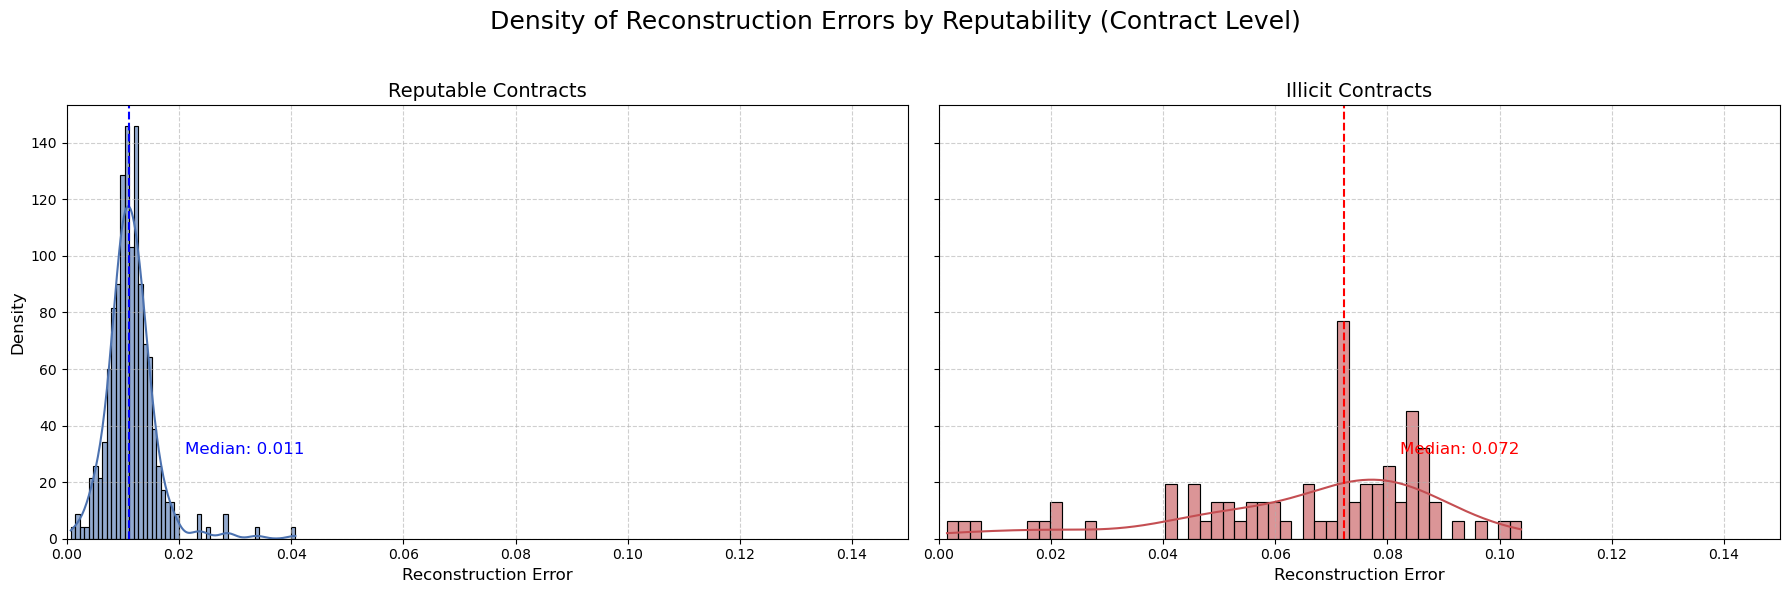

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

contract_df = reconstruction_df.groupby('address').agg({
    'reconstruction_error': 'mean',  # Mean reconstruction error per contract
    'contract_status': 'first'       # Take the first value of contract_status (since it's consistent within each address)
}).reset_index()
# Calculate median values for annotations
median_reputable = contract_df[contract_df['contract_status'] == 1]['reconstruction_error'].median()
median_illicit = contract_df[contract_df['contract_status'] == 0]['reconstruction_error'].median()

# Create two subplots: one for is_reputable=1 (reputable) and one for is_reputable=0 (illicit)
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Common x-axis limit
x_limit = (0, 0.15)  # Adjust according to your data range

# Plot for is_reputable = 1 (reputable) with density
sns.histplot(contract_df[contract_df['contract_status'] == 1]['reconstruction_error'], 
             bins=50, kde=True, color='#4C72B0', stat='density', ax=axes[0], alpha=0.6)
axes[0].set_title('Reputable Contracts', fontsize=14)
axes[0].set_xlabel('Reconstruction Error', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_xlim(x_limit)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Annotate median
axes[0].axvline(median_reputable, color='blue', linestyle='--')
axes[0].text(median_reputable + 0.01, 30, f'Median: {median_reputable:.3f}', color='blue', fontsize=12)


# Plot for is_reputable = 0 (illicit) with density
sns.histplot(contract_df[contract_df['contract_status'] == 0]['reconstruction_error'], 
             bins=50, kde=True, color='#C44E52', stat='density', ax=axes[1], alpha=0.6)
axes[1].set_title('Illicit Contracts', fontsize=14)
axes[1].set_xlabel('Reconstruction Error', fontsize=12)
axes[1].set_xlim(x_limit)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Annotate median
axes[1].axvline(median_illicit, color='red', linestyle='--')
axes[1].text(median_illicit + 0.01, 30, f'Median: {median_illicit:.3f}', color='red', fontsize=12)

# Set a common title and adjust layout
fig.suptitle('Density of Reconstruction Errors by Reputability (Contract Level)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


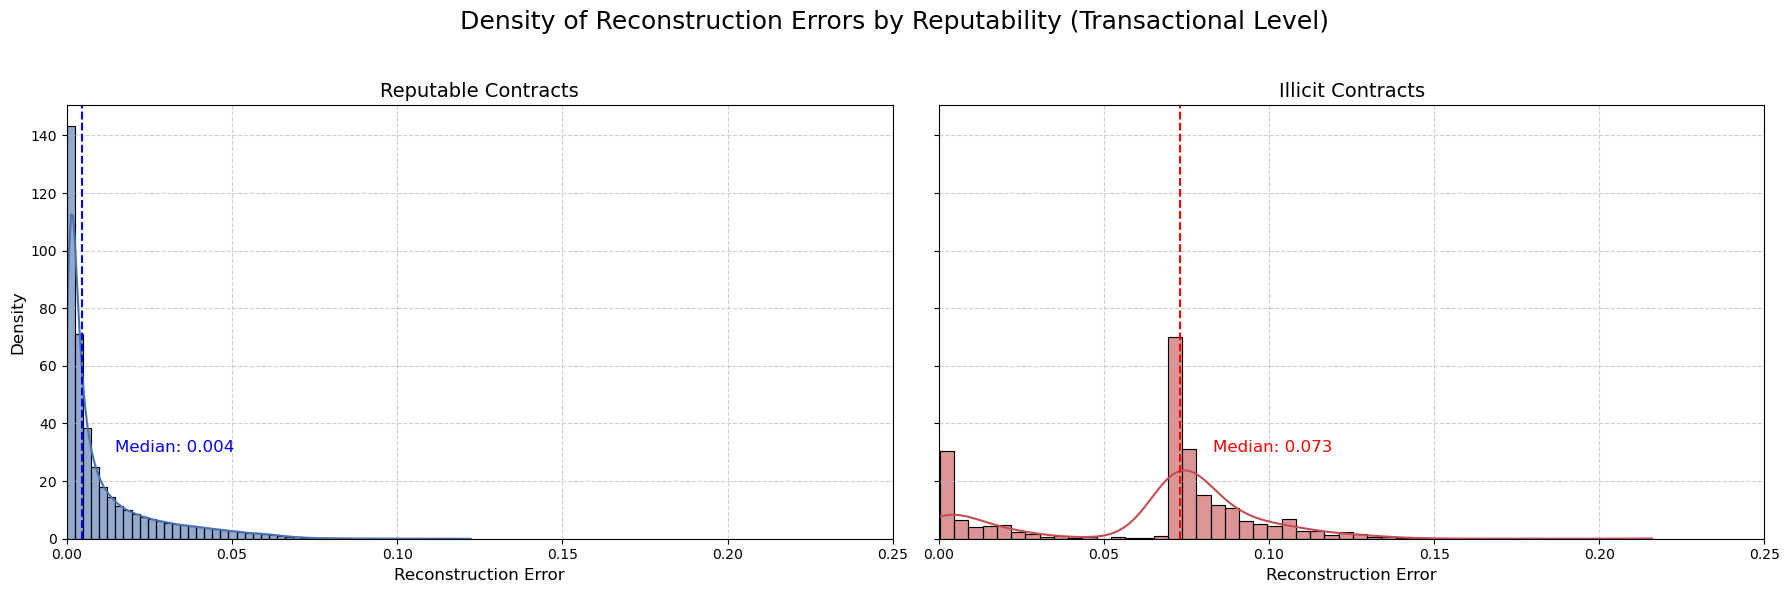

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate median values for annotations
median_reputable = reconstruction_df[reconstruction_df['contract_status'] == 1]['reconstruction_error'].median()
median_illicit = reconstruction_df[reconstruction_df['contract_status'] == 0]['reconstruction_error'].median()

# Create two subplots: one for is_reputable=1 (reputable) and one for is_reputable=0 (illicit)
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Common x-axis limit
x_limit = (0, 0.25)  # Adjust according to your data range

# Plot for is_reputable = 1 (reputable) with density
sns.histplot(reconstruction_df[reconstruction_df['contract_status'] == 1]['reconstruction_error'], 
             bins=50, kde=True, color='#4C72B0', stat='density', ax=axes[0], alpha=0.6)
axes[0].set_title('Reputable Contracts', fontsize=14)
axes[0].set_xlabel('Reconstruction Error', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_xlim(x_limit)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Annotate median
axes[0].axvline(median_reputable, color='blue', linestyle='--')
axes[0].text(median_reputable + 0.01, 30, f'Median: {median_reputable:.3f}', color='blue', fontsize=12)

# Plot for is_reputable = 0 (illicit) with density
sns.histplot(reconstruction_df[reconstruction_df['contract_status'] == 0]['reconstruction_error'], 
             bins=50, kde=True, color='#C44E52', stat='density', ax=axes[1], alpha=0.6)
axes[1].set_title('Illicit Contracts', fontsize=14)
axes[1].set_xlabel('Reconstruction Error', fontsize=12)
axes[1].set_xlim(x_limit)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Annotate median
axes[1].axvline(median_illicit, color='red', linestyle='--')
axes[1].text(median_illicit + 0.01, 30, f'Median: {median_illicit:.3f}', color='red', fontsize=12)

# Set a common title and adjust layout
fig.suptitle('Density of Reconstruction Errors by Reputability (Transactional Level)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


In [17]:
X_ill = X_ill.get()

In [19]:
X_combined = np.concatenate([X_rep, X_ill], axis=0)
addresses_combined = np.concatenate([addresses_rep, addresses_ill], axis=0)
labels_combined = np.concatenate([np.ones(X_rep.shape[0]), np.zeros(X_ill.shape[0])], axis=0)  # 1 for reputable, 0 for illicit
X_combined = X_combined

1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Shape of 2D latent representations: (35016, 24)


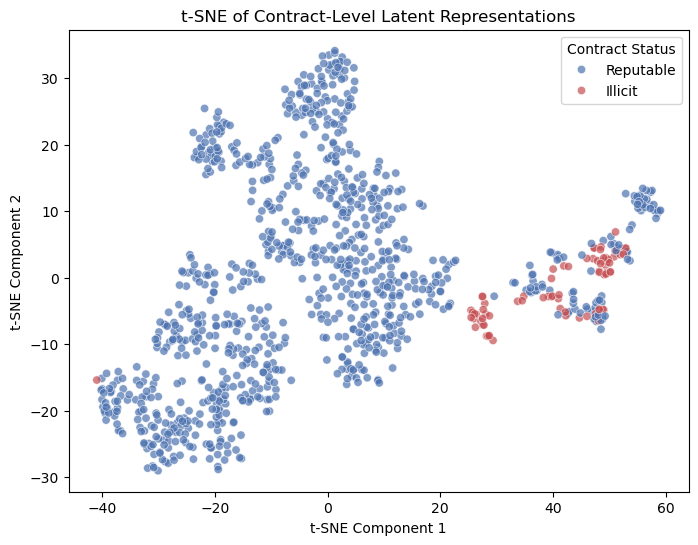

In [27]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the latent representations (bottleneck layer output)
# Define a new model to extract the latent space from the autoencoder
latent_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer("max_pooling1d_1").output) # bottleneck layer 

# Get latent representations for the entire dataset
latent_representations = latent_model.predict(X_combined)

latent_representations_2d = latent_representations.reshape(latent_representations.shape[0], -1)

# Check the shape to ensure it's 2D
print("Shape of 2D latent representations:", latent_representations_2d.shape)

# Assuming `transaction_labels` contains contract addresses for each transaction
# Convert transaction_labels to a DataFrame to handle grouping
transaction_df = pd.DataFrame({
    'latent': list(latent_representations_2d),
    'contract_address': addresses_combined
})

label_mapping = {1.0: 'Reputable', 0.0: 'Illicit'}
# Calculate the mean representation for each contract
latent_representations_contract = transaction_df.groupby('contract_address')['latent'].apply(np.mean).tolist()
latent_representations_contract = np.array(latent_representations_contract)

# Generate contract-level labels (assuming `labels_combined` has a label per transaction)
# Here, contract_labels should contain a single label per contract.
contract_labels = pd.Series(labels_combined).groupby(addresses_combined).first().values
contract_labels_named = pd.Series(contract_labels).map(label_mapping)

# Apply PCA to contract-level representations
tsne = TSNE(n_components=2)
latent_tsne_contract = tsne.fit_transform(latent_representations_contract)

# Create a mapping from numerical labels to descriptive labels
label_mapping = {1.0: 'Reputable', 0.0: 'Illicit'}
contract_labels_named = pd.Series(contract_labels).map(label_mapping)

# Plot PCA for contracts
plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_tsne_contract[:, 0], y=latent_tsne_contract[:, 1], hue=contract_labels_named, alpha=0.7,
                palette={'Reputable': '#4C72B0', 'Illicit': '#C44E52'})
plt.title('t-SNE of Contract-Level Latent Representations')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Contract Status')
plt.show()

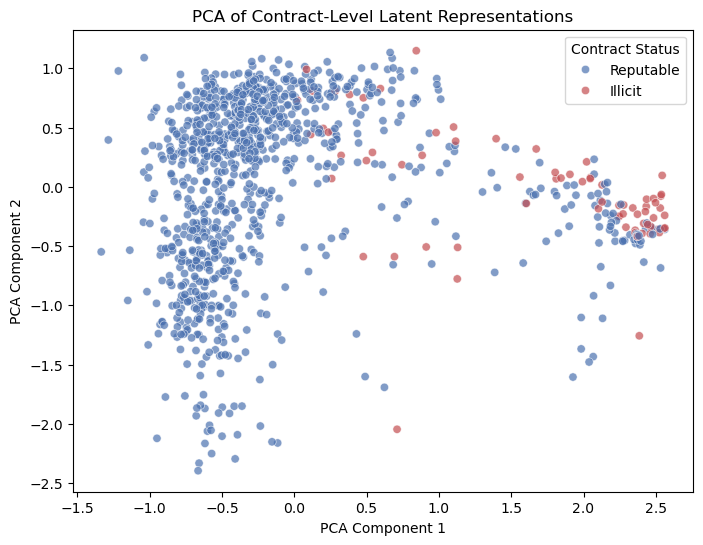

In [22]:
# Apply PCA to contract-level representations
pca = PCA(n_components=2)
latent_pca_contract = pca.fit_transform(latent_representations_contract)

# Create a mapping from numerical labels to descriptive labels
label_mapping = {1.0: 'Reputable', 0.0: 'Illicit'}
contract_labels_named = pd.Series(contract_labels).map(label_mapping)

# Plot PCA for contracts
plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_pca_contract[:, 0], y=latent_pca_contract[:, 1], hue=contract_labels_named, alpha=0.7,
                palette={'Reputable': '#4C72B0', 'Illicit': '#C44E52'})
plt.title('PCA of Contract-Level Latent Representations')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Contract Status')
plt.show()